<div class="alert alert-block alert-info">
This tutorial includes 5 lab questions. The questions have headers like <font color='red'><b>Lab question 1</b></font> in red font. Everyone please do the first four. Everyone is welcome to try #5, but it is required for grad students and honors students.  Submit your answers via WebCT and remember to paste in the question text (that really helps me grade faster!).  
</div>

# Neural networks, Part 2 -- training networks

---

## Networks that learn

Now let's look at ways that we can train networks for the functions OR, AND, and NAND. 

Our starting point is the **Perceptron** model from the 1950s. It was developed by psychologist Frank Rosenblatt. It was originally an actual electronic device made to try to simulate the operation of biological neurons. He developed a learning rule for the device that allowed it to learn by trial and error. 

---

## Perceptron Learning Rule

The perceptron learning rule is a foundational algorithm in machine learning (Rosenblatt, 1958). It is used for training single-layer perceptrons, a basic type of artificial neuron, and forms the basis for more complex neural networks.

### Key Features

1. **Binary Classification**: Designed for binary classification tasks, where it predicts one of two classes.

2. **Linear Decision Boundary**: It computes a linear decision boundary based on the weighted sum of inputs.

3. **Weights Adjustment**: Adjusts weights based on classification accuracy. Increases weights for correct predictions and decreases for errors.

4. **Algorithm**:
   - Initialize weights and threshold.
   - For each training sample:
     - Compute output based on current weights.
     - If the output is incorrect, update weights:
       $$ w_i \leftarrow w_i + \eta(y - \hat{y})x_i $$  
       where $ w_i $ is the weight, $ \eta $ ('eta') is the learning rate, $ y $ the actual label, $ \hat{y} $ ('y hat') is the predicted label, and $ x_i $ is the input feature.

5. **Convergence**: If the input-output mapping is linearly separable, the perceptron is guaranteed to converge to a solution.

6. **Limitations**: Single-layer perceptrions (i.e., networks with only one set of weights) can only model linearly separable functions and will fail to converge for non-linearly separable mappings (Minsky & Pappert, 1969; Bishop, 2006).

<div class="alert alert-block alert-info">

## Linearly Separable Mapping

A linearly separable mapping refers to a scenario where a set of data points belonging to two classes can be completely separated by a linear boundary. If the input patterns have just 2 dimensions (i.e., there are 2 inputs), the mapping is linearly separable if you can plot the inputs in 2d and draw a single straight line that separates the inputs into the output categories. If you have more than 3 dimensions, the same thing applies, but now we talk about separating the output categories with a hyperplane (e.g., for 3 dimensions, we would make a 3d plot, and then the question is whether a single plane [imagine a sheet of perfectly stiff paper] in some 3d rotation could separate the output categories). This concept is fundamental in machine learning and pattern recognition.

### Characteristics

- **Two Classes**: Involves data points that are categorized into two distinct classes. (Conceptually, this can be extended to more classes where linearly separable could mean that you can segregate your $n$ classes with $n-1$ straight lines or hyperplanes [where one line segregates class 1 from all other classes, a second line segregates class 2 from classes 3 to $n$, and so on, until line $n-1$ separates class $n-1$ from class $n$], but we will focus on two classes here.)

- **Separation by a Line (or Hyperplane)**: There exists a line (in two dimensions) or a hyperplane (in higher dimensions) that can separate the data points into their respective classes without any overlap.

- **Examples**: 
  - In two dimensions, consider a set of points on a plane belonging to either Class A or Class B. These points are linearly separable if a straight line can be drawn to separate all points of Class A from those of Class B.
  - In higher dimensions, the concept extends to hyperplanes.

### Importance in Machine Learning

- **Model Selection**: Linearly separable data can often be effectively modeled with simple linear classifiers, such as the perceptron.
  
- **Limitations**: Some seemingly simple datasets (input-output mappings) cannot be separated linearly (including XOR, as we will see soon); thus, we need more sophisticated models like multi-layer neural networks.

Linear separability is a key concept in understanding the capabilities and limitations of different classifiers and in choosing the appropriate machine learning model (or neural network architecture) for a given dataset.
</div>

#### References
- Rosenblatt, F. (1958). *The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain*. Psychological Review, 65(6), 386–408.
- Minsky, M. L., & Papert, S. A. (1969). *Perceptrons: An Introduction to Computational Geometry*. The MIT Press.
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.

---

# Learning AND

We can implement training for a simple perceptron for the AND problem as follows. We are also going to do something slightly fancy and print total error after each step in a dynamically updating plot. It also adjusts the x-range based on the value of `try_updates` -- every time it reaches a multiple of that value, it extends the x-axis by that value (as it turns out, this is unnecessary; matplotlib does a great job just gradually extending plots, as we will see later, but I have not had time to revise this). It stops if it reaches `max_updates` without converging (that is, without finding weights that allow it to solve the task). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap

def train_perceptron(inputs, expected_outputs, learning_rate=0.05, sd=0.05, nsd=0.3, 
                     max_updates=2000, pstyle='line', psize=1,
                     try_updates=50, sleeptime=0.0, rseed=37, ptitle='Perceptron training progress', 
                    thresh = 0.0):
    """
    Trains a perceptron model and plots the training progress along with a heatmap of inputs and outputs.

    Parameters:
    inputs (np.array): Input data (features with bias included).
    expected_outputs (np.array): Expected output labels.
    learning_rate (float): Learning rate for weight updates.
    sd (float): Standard deviation for random weight initialization.
    max_updates (int): Maximum number of updates/iterations for training.
    sleeptime (float): Time in seconds to pause after each update for dynamic plotting.
    """
    # Set random seed for reproducibility, only if rseed is not None
    if rseed is not None:
        np.random.seed(rseed)

    # Initialize weights
    weights = np.random.normal(0, sd, size=inputs.shape[1])

    # To store total error after each update
    total_errors = []
    total_updates = 0
    # Training loop
    while total_updates < max_updates:
        no_error = True
        for update in range(try_updates):
            # Add noise to inputs
            noisy_inputs = inputs + np.random.normal(0, nsd, inputs.shape)

            total_error = 0
            for input, expected in zip(noisy_inputs, expected_outputs):
                predicted = 1 if np.dot(input, weights) > thresh else 0
                weights += learning_rate * (expected - predicted) * input
                total_error += abs(expected - predicted)
            total_updates += 1

            total_error = 0
            for input, expected in zip(inputs, expected_outputs):
                predicted = 1 if np.dot(input, weights) > thresh else 0
                total_error += abs(expected - predicted)
            total_errors.append(total_error)

            # Dynamic plotting
            clear_output(wait=True)
            fig, ax = plt.subplots(1, 2, figsize=(15, 6))

            # Plot for training progress
            ax[0].set_title(ptitle)
            if pstyle == 'line':
                ax[0].plot(range(total_updates - len(total_errors), total_updates), total_errors, label='Total Error over Updates')
            else:
                ax[0].scatter(range(total_updates - len(total_errors), total_updates), 
                              total_errors, label='Total Error over Updates', s=psize)
            ax[0].set_xlabel('Number of Updates')
            ax[0].set_ylabel('Total Error')
            ax[0].set_xlim(-0.5, ((total_updates // try_updates) + 1) * try_updates)
            ax[0].set_ylim(-0.5, max(total_errors) + 1)
            ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
            ax[0].grid(True, color='lightgrey')

            # Heatmap for inputs and outputs
            xmax = 1.1
            ymax = 1.1
            observed_outputs = np.array([1 if np.dot(np.append(input[:2], 1), weights) > thresh else 0 for input in inputs])
            cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
            cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
            xx, yy = np.meshgrid(np.linspace(0, xmax, 100), np.linspace(0, ymax, 100))
            Z = np.array([1 if np.dot(np.array([x, y, 1]), weights) > thresh else 0 for x, y in zip(xx.ravel(), yy.ravel())])
            Z = Z.reshape(xx.shape)
            ax[1].contourf(xx, yy, Z, cmap=cmap_light)
            ax[1].scatter(inputs[:, 0], inputs[:, 1], c=expected_outputs, cmap=cmap_bold, edgecolor='k')
            ax[1].set_xlim(0, xmax)
            ax[1].set_ylim(0, ymax)
            ax[1].set_xlabel('Input 1')
            ax[1].set_ylabel('Input 2')
            ax[1].set_title('Decision boundary')

            plt.show()
            time.sleep(sleeptime)

            if total_error == 0:
                print(f"Converged after {total_updates} updates")
                no_error = True
                break
            else:
                no_error = False

        if no_error:
            break

        if total_updates >= max_updates:
            print(f"Did not converge after {total_updates} updates (max set to {max_updates})")
            break
                        
    # Test the trained perceptron
    for input in inputs:
        predicted = 1 if np.dot(input, weights) > thresh else 0
        print(f"Input: {input[:2]}, Output: {predicted}")

    # Final weights
    print("Final weights:", weights)
    return weights           

inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
or_expected_outputs = np.array([0, 0, 0, 1])  # AND outputs

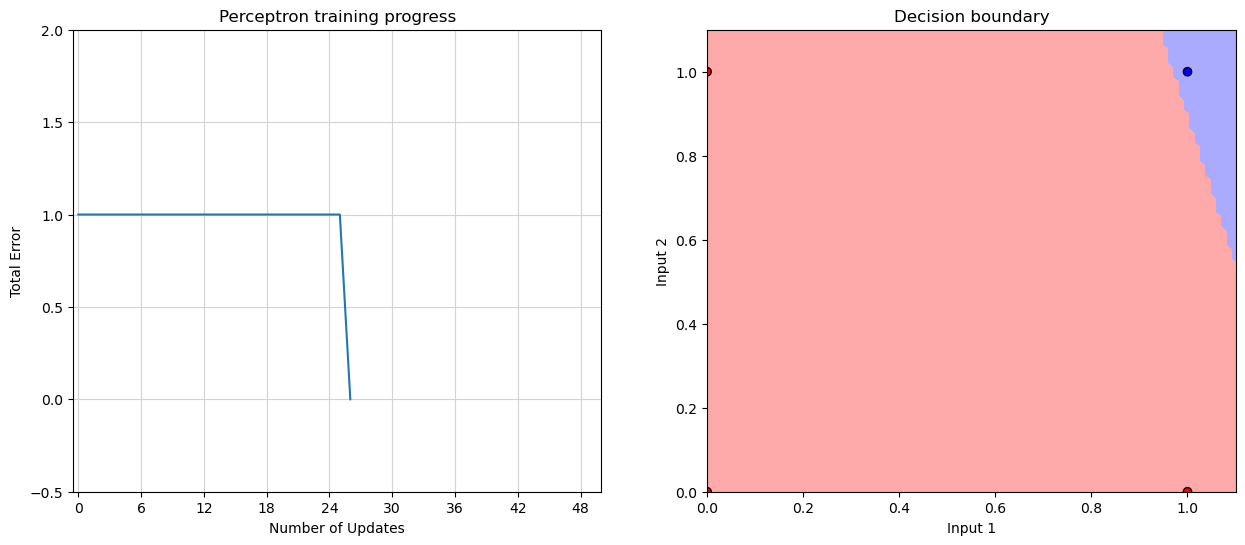

Converged after 27 updates
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1
Final weights: [ 1.30874499  0.36788958 -1.64112247]


In [3]:
or_wts = train_perceptron(inputs, or_expected_outputs, learning_rate=0.05, sd=2.0, 
                           try_updates=50, max_updates=4000, rseed=None)

*Note that the blue region is where the network outputs 1, and the red region is where it outputs 0.*

## Plot the network

Now let's plot the network with code from our previous notebook. 

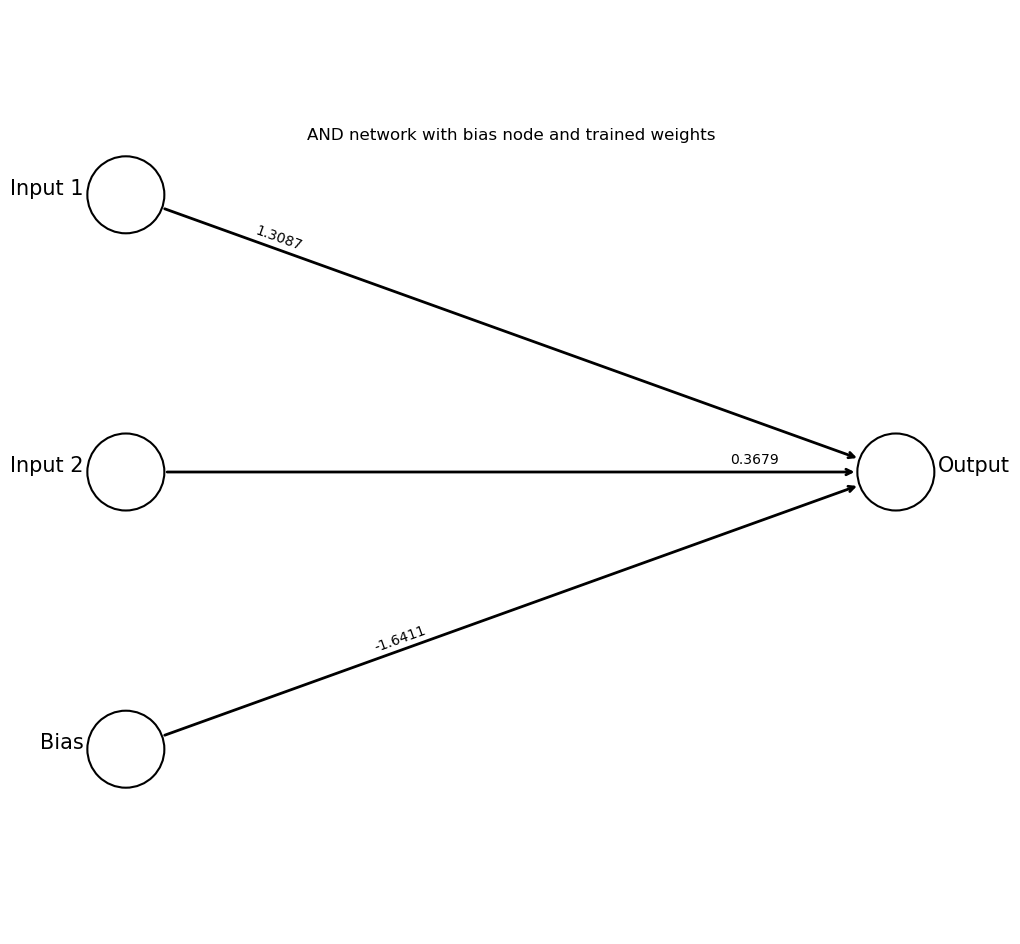

In [4]:
import network_plotter as netplot
import numpy as np
import matplotlib.pyplot as plt

# Setup for the AND network plot
plot_width = 10.0
plot_height = plot_width
fig_width = plot_width * 1.2
fig_height = fig_width
figsize = (fig_width, fig_height)

# Define the network for the AND function
layers_and = [
    ['Input 1', 'Input 2', 'Bias'],
    ['Output']
]

# Set weights for the AND function
# Both inputs need to be 1 to exceed the threshold of 1.5
#input_to_output_weights_and = np.array([1.0, 1.0, -1.5])

# Instead of setting the weights, we will use the ones we just got from training. 
input_to_output_weights_and = or_wts


# Creating the figure for the AND network
fig, ax = plt.subplots(figsize=figsize)
ax.set_xlim(0, fig_width)
ax.set_ylim(0, fig_height)
ax.set_aspect('equal', adjustable='box')

# Calculate node positions for the AND network
node_positions_and = netplot.calculate_node_positions(layers_and, plot_width, fig_width, fig_height)

# Draw Neurons with Labels for the AND network
num_layers_and = len(layers_and)
subtext_and = ''
nodetext_and = ''
for i, column in enumerate(layers_and):
    for node in column:
        pos = node_positions_and[node]
        # if i == num_layers_and - 1:
        #     subtext_and = 'Threshold: 1.5'
        netplot.draw_neuron_with_label(ax, pos, node, i, num_layers_and, plot_width=plot_width, subtext=subtext_and, nodetext=nodetext_and)

# Draw Connections with Weights for the AND network
for i, input_node in enumerate(layers_and[0]):
    weight = input_to_output_weights_and[i]
    netplot.draw_connection_with_weight(ax, node_positions_and, input_node, 'Output', weight, show_weight=True, plot_width=plot_width)

plt.title('AND network with bias node and trained weights', x=0.5, y=0.85)
plt.axis('off')
plt.show()


---

## <font color='red'>Lab question 1</font>

*Answer these as 1.1 and 1.2*

1. What weights did you get for the trained network? Compare them to the weights we used in the previous notebook when we set weights for Inputs to Output and Bias to Output. Explain why these learned weights work, and how they relate to our hand-set weights.
2. Describe the decision boundary. 

---

## Training an OR network

Now let's see if we can train an OR network. This one seems to suddenly jump to a solution often. Why do you think that is? 

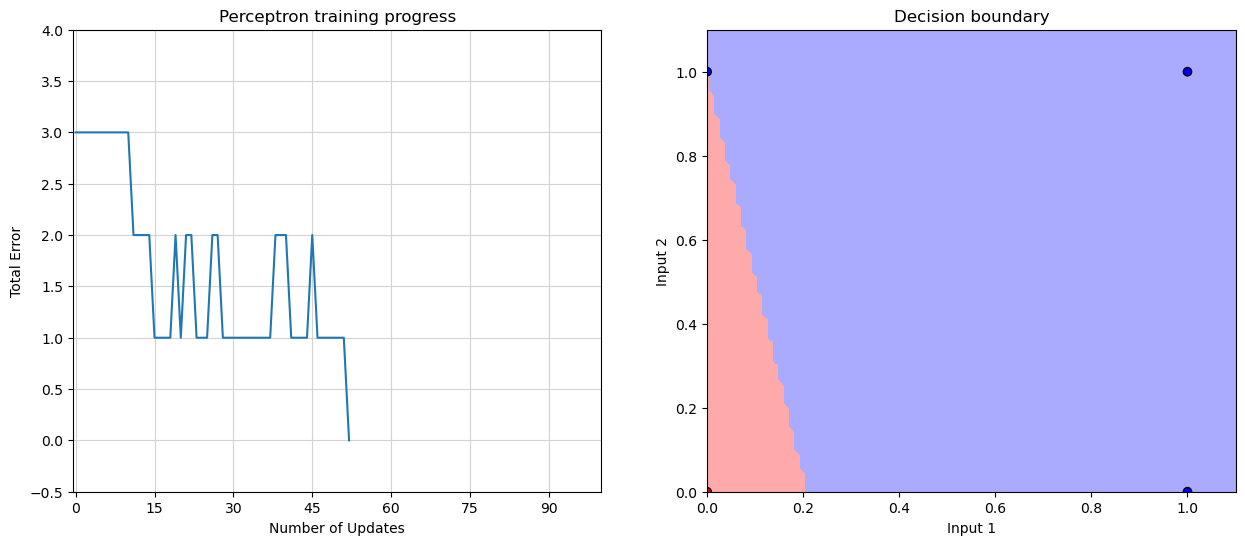

Converged after 53 updates
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1
Final weights: [ 0.57376811  0.12028419 -0.12018204]


In [5]:
or_expected_outputs = np.array([0, 1, 1, 1])  # OR outputs


or_wts = train_perceptron(inputs, or_expected_outputs, learning_rate=0.1, sd=2.0, try_updates=50, max_updates=4000, rseed=None)



## Let's repeat our training to see how consistent the results are

To get a sense of how general and variable the solutions are, we could run this multiple times, save the resulting weights, and then just print them in a table. Wait for this to run (it runs 10 times, which takes about a minute), and then you'll get a table showing the results from each run. 

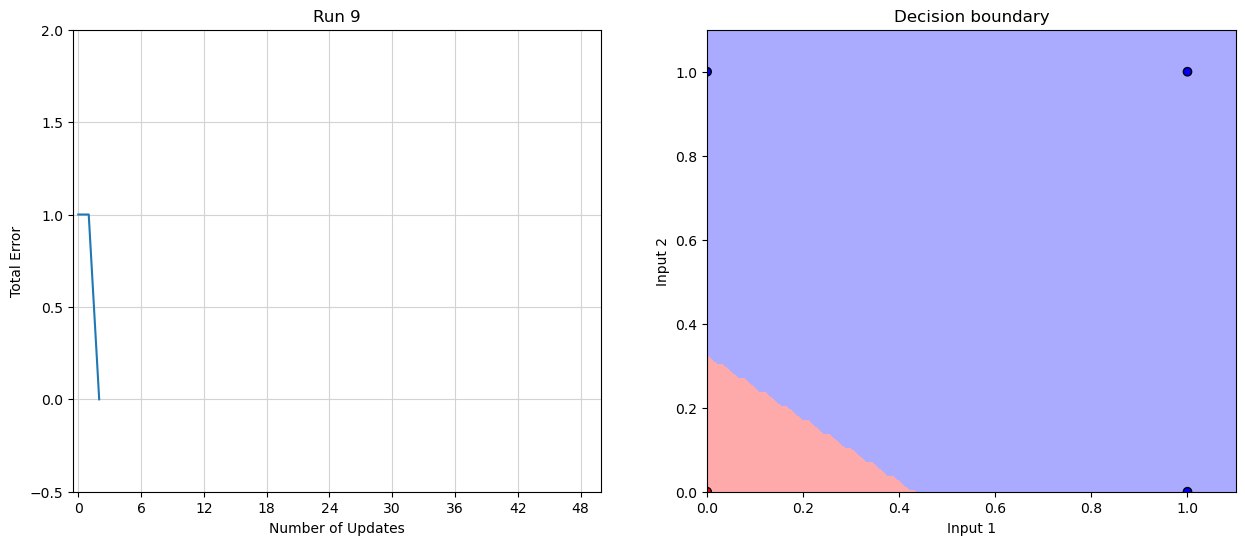

Converged after 3 updates
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1
Final weights: [ 1.46359257  1.95617803 -0.63659641]


,Larger_Weight,Smaller_Weight,Bias
0,3.576494,3.548868,-2.864484
1,2.925951,1.628611,-0.808481
2,1.835703,1.140621,-0.983899
3,1.913870,1.553047,-1.106643
4,0.657302,0.390478,-0.019383
5,1.463614,0.876451,-0.395995
6,2.437636,1.345401,-0.535434
7,1.312729,0.873479,-0.709999
8,1.027015,0.362533,-0.070765
9,1.956178,1.463593,-0.636596


In [6]:
import pandas as pd
import time

# Initialize the list to store successful weights
successful_weights = []

# Run the training 10 times
for run in range(10):
    or_wts = train_perceptron(inputs, or_expected_outputs, ptitle=f'Run {run}',
                              learning_rate=0.5, sd=2.0, try_updates=50, max_updates=4000, rseed=None)
    # Separate the larger and smaller weights and append them with the bias
    larger_weight = max(or_wts[0], or_wts[1])
    smaller_weight = min(or_wts[0], or_wts[1])
    successful_weights.append([larger_weight, smaller_weight, or_wts[2]])
    time.sleep(1)

# Create a DataFrame with columns for larger weight, smaller weight, and bias
weights_df = pd.DataFrame(successful_weights, columns=['Larger_Weight', 'Smaller_Weight', 'Bias'])

# Calculate the mean of the larger and smaller weights separately, along with the bias
mean_weights = pd.DataFrame([weights_df.mean()], columns=weights_df.columns)
mean_weights.index = ['Mean']

# Concatenate the mean row to the DataFrame
weights_df_with_mean = pd.concat([weights_df, mean_weights])
weights_df_with_mean


---

## <font color='red'>Lab question 2</font>

*Answer these as 2.1, 2.2, and 2.3*

1. What weights did you get for the 10 trained networks (just report the mean values)? Compare them to the weights we used in the previous notebook when we set weights for Inputs to Output and Bias to Output. Explain why these learned weights work, and how they relate to our hand-set weights. 

2. Describe the decision boundary.

3. Insert a new code block and copy the code from the block above. Then do 10 runs with the AND network by putting in the following line in place of the ```or_wts = ...``` line: ```or_wts = train_perceptron(inputs, or_expected_outputs, learning_rate=0.1, sd=2.0, try_updates=50, max_updates=4000, rseed=None)```. Also change the line ```successful_weights.append(or_wts)``` to ```successful_weights.append(or_wts)```. Report the means you get. Include a screenshot of the table. *If you get stuck on this, contact me.*


---

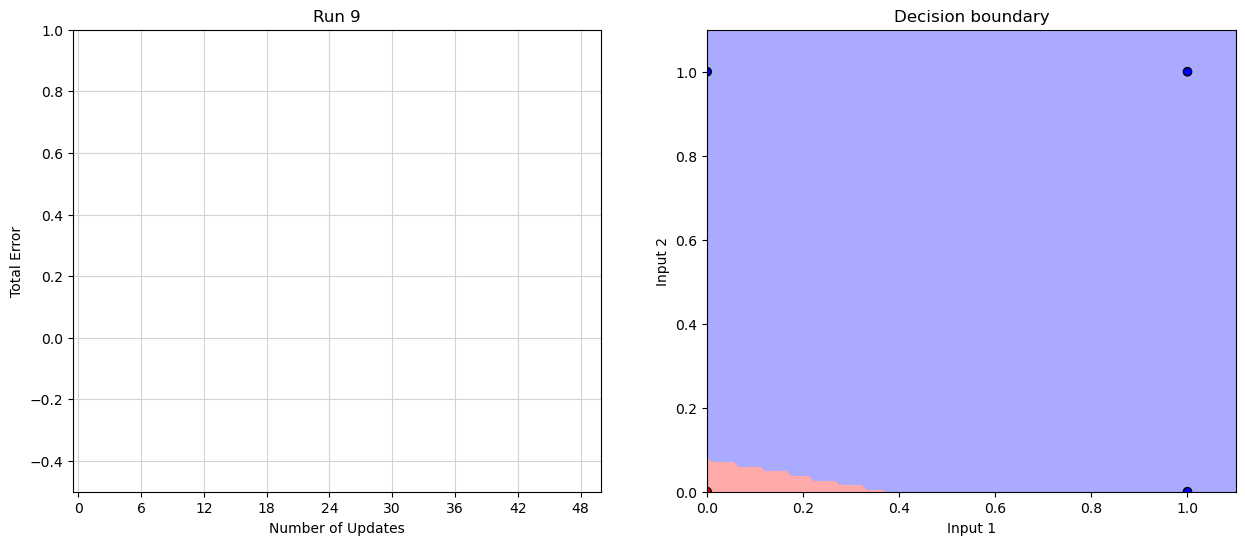

Converged after 1 updates
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1
Final weights: [ 0.28838952  1.36272995 -0.10874657]


,Larger_Weight,Smaller_Weight,Bias
0,3.331825,2.044109,-0.691426
1,1.481910,0.385922,-0.044564
2,2.808744,2.002846,-0.050263
3,1.288625,1.142230,-0.043558
4,0.635191,0.436402,-0.282148
5,2.660452,1.530449,-1.526812
6,2.428474,0.973155,-0.001680
7,0.722275,0.539679,-0.526611
8,0.649138,0.078468,-0.019596
9,1.362730,0.288390,-0.108747


In [6]:
import pandas as pd
import time

# Initialize the list to store successful weights
successful_weights = []

# Run the training 10 times
for run in range(10):
    or_wts = train_perceptron(inputs, or_expected_outputs, ptitle=f'Run {run}',
                              learning_rate=0.5, sd=2.0, try_updates=50, max_updates=4000, rseed=None)
    # Separate the larger and smaller weights and append them with the bias
    larger_weight = max(or_wts[0], or_wts[1])
    smaller_weight = min(or_wts[0], or_wts[1])
    successful_weights.append([larger_weight, smaller_weight, or_wts[2]])
    time.sleep(1)

# Create a DataFrame with columns for larger weight, smaller weight, and bias
weights_df = pd.DataFrame(successful_weights, columns=['Larger_Weight', 'Smaller_Weight', 'Bias'])

# Calculate the mean of the larger and smaller weights separately, along with the bias
mean_weights = pd.DataFrame([weights_df.mean()], columns=weights_df.columns)
mean_weights.index = ['Mean']

# Concatenate the mean row to the DataFrame
weights_df_with_mean = pd.concat([weights_df, mean_weights])
weights_df_with_mean


## Training a NAND network

Now let's see if we can train an NAND network. Let's do it 10 times. 

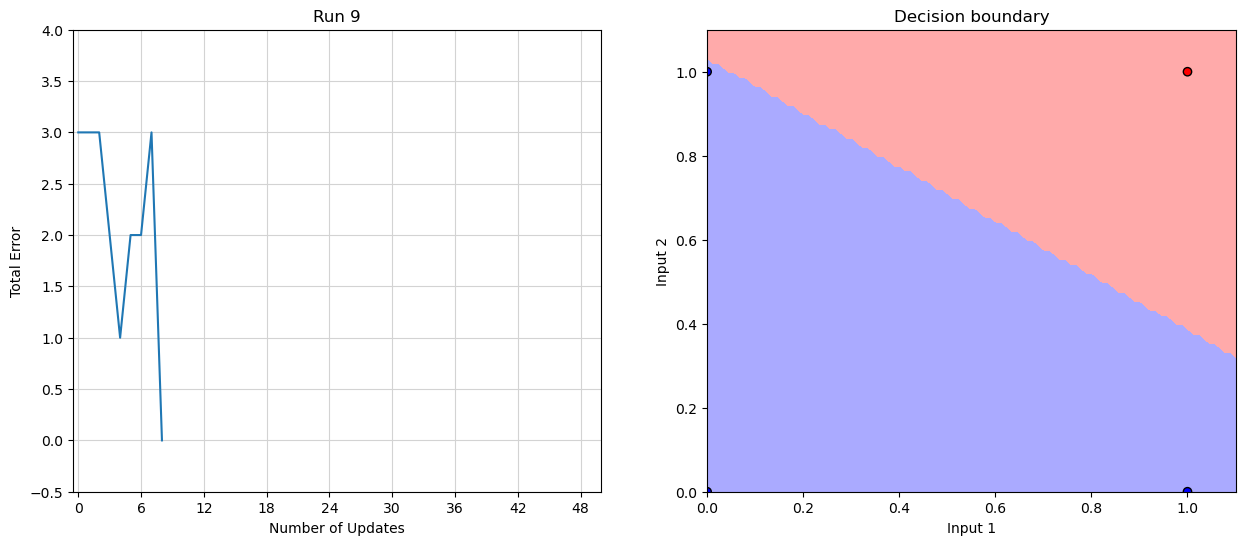

Converged after 9 updates
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0
Final weights: [-0.21254344 -0.32925927  0.33859394]


,Larger_Weight,Smaller_Weight,Bias
0,-0.722045,-1.123890,1.398404
1,-0.231930,-1.664832,1.705817
2,-0.543070,-0.919050,0.961357
3,-0.590307,-0.739108,1.031476
4,-0.835591,-0.923318,1.043114
5,-0.625453,-2.196878,2.751094
6,-1.522263,-1.555562,1.932204
7,-0.829974,-1.016079,1.230606
8,-0.847923,-1.090429,1.147479
9,-0.212543,-0.329259,0.338594


In [7]:
import pandas as pd
import numpy as np
import time

nor_expected_outputs = np.array([1, 1, 1, 0])  # NAND outputs

# Initialize the list to store successful weights
successful_weights = []

# Run the training 10 times
for run in range(10):
    or_wts = train_perceptron(inputs, nor_expected_outputs, ptitle=f'Run {run}',
                              learning_rate=0.5, sd=2.0, try_updates=50, max_updates=4000, rseed=None)
    # Separate the larger and smaller weights and append them with the bias
    larger_weight = max(or_wts[0], or_wts[1])
    smaller_weight = min(or_wts[0], or_wts[1])
    successful_weights.append([larger_weight, smaller_weight, or_wts[2]])
    time.sleep(1)

# Create a DataFrame with columns for larger weight, smaller weight, and bias
weights_df = pd.DataFrame(successful_weights, columns=['Larger_Weight', 'Smaller_Weight', 'Bias'])

# Calculate the mean of the larger and smaller weights separately, along with the bias
mean_weights = pd.DataFrame([weights_df.mean()], columns=weights_df.columns)
mean_weights.index = ['Mean']

# Concatenate the mean row to the DataFrame
weights_df_with_mean = pd.concat([weights_df, mean_weights])
weights_df_with_mean


---

## <font color='red'>Lab question 3</font>

*Answer these as 3.1 and 3.2*

1. What weights did you get for the 10 trained networks (just report the mean values)? Compare them to the weights we used in the previous notebook when we set weights for Inputs to Output and Bias to Output. Explain why these learned weights work, and how they relate to our hand-set weights. 

2. Describe the decision boundary. 

---

## Training an XOR network...?

Now let's see if we can train a XOR network. Let's do it 3 times (you'll see why). This will take a couple of minutes. 

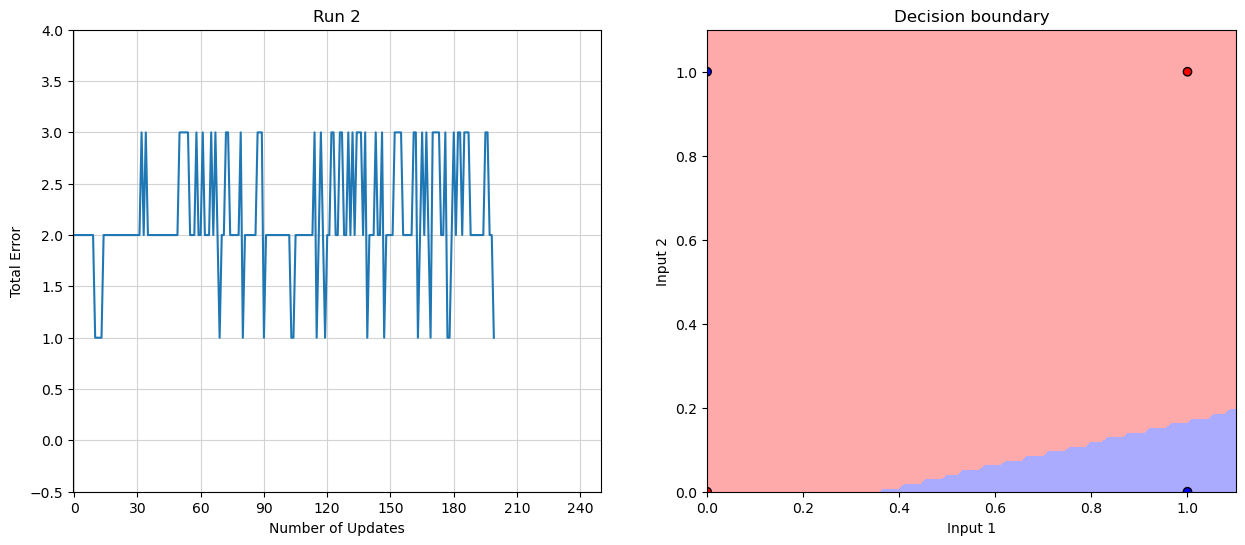

Did not converge after 200 updates (max set to 200)
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 1
Input: [1 1], Output: 0
Final weights: [ 0.01574733 -0.06054488 -0.00570119]


,Larger_Weight,Smaller_Weight,Bias
0,-0.054186,-0.119203,0.069819
1,-0.025847,-0.076931,0.021798
2,0.015747,-0.060545,-0.005701
Mean,-0.021429,-0.085560,0.028639


In [7]:
import pandas as pd
import numpy as np
import time

xor_expected_outputs = np.array([0, 1, 1, 0])  # XOR outputs

# Initialize the list to store successful weights
successful_weights = []

# Run the training just 3 times, since we know it will not converge
for run in range(3):
    or_wts = train_perceptron(inputs, xor_expected_outputs, ptitle=f'Run {run}',
                              learning_rate=0.05, sd=2.0, try_updates=50, max_updates=200, rseed=None)
    # Separate the larger and smaller weights and append them with the bias
    larger_weight = max(or_wts[0], or_wts[1])
    smaller_weight = min(or_wts[0], or_wts[1])
    successful_weights.append([larger_weight, smaller_weight, or_wts[2]])
    time.sleep(1)

# Create a DataFrame with columns for larger weight, smaller weight, and bias
weights_df = pd.DataFrame(successful_weights, columns=['Larger_Weight', 'Smaller_Weight', 'Bias'])

# Calculate the mean of the larger and smaller weights separately, along with the bias
mean_weights = pd.DataFrame([weights_df.mean()], columns=weights_df.columns)
mean_weights.index = ['Mean']

# Concatenate the mean row to the DataFrame
weights_df_with_mean = pd.concat([weights_df, mean_weights])
weights_df_with_mean


## Towards solving XOR

Okay, the problem with XOR is that there is no way to draw a single straight line that divides the space appropriately. Let's look at it. 

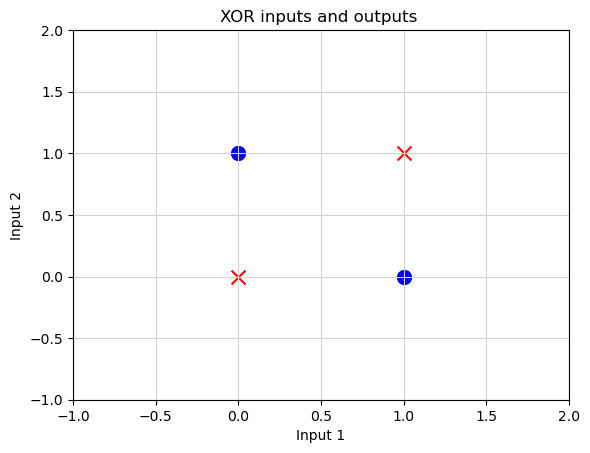

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the inputs
for point, output in zip(inputs, xor_expected_outputs):
    if output == 1:
        plt.scatter(point[0], point[1], color='blue', marker='o', s=100)  # Output 1
    else:
        plt.scatter(point[0], point[1], color='red', marker='x', s=100)  # Output 0

# Annotations and labels
plt.title('XOR inputs and outputs ')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid(True, color='lightgrey')
plt.show()


## What to do? 

So what are some other things we could do? Can we turn this into a **set** of linear decisions? That is, can we find combinations of simpler logical operators that together correspond to XOR? 

One way to think about this is that we want one thing to be true but another to be false (or two things to be true)... Let's look at the XOR truth table. 


## Truth table for XOR

| Input A | Input B | Output (A XOR B) |
|---------|---------|-----------------|
| False   | False   | False           |
| False   | True    | True            |
| True    | False   | True            |
| True    | True    | False           |

We can rewrite this using numbers, where 0 = False and 1 = True.

| Input A | Input B | Output (A XOR B) |
|:-------:|:-------:|:----------------:|
| 0       | 0       | 0                |
| 0       | 1       | 1                |
| 1       | 0       | 1                |
| 1       | 1       | 0                |

## Make it modular

Think about the other functions we have discussed -- OR, AND, and NAND. OR is true for every case where XOR is true *except* for 1,1. Is there another function that can tell us about that specific case? 

Maybe **AND** could help us. We want the cases where OR is true **but** AND is false. Do you see why?

In other words, we want cases where OR is true and so is NAND (remember, not-AND). 

Examine this table. The last column uses the $\wedge$ symbol for **AND**, so we are tabulating whether both OR and NAND are true. When both are true, we find the true cases for XOR. 

| Input A | Input B | OR | AND | NAND | XOR | OR $\wedge$ NAND |
|:-------:|:-------:|:--:|:---:|:----:|:---:|:----------------:|
| 0       | 0       | 0  |  0  |  1   |  0  |        0         |
| 0       | 1       | 1  |  0  |  1   |  1  |        1         |
| 1       | 0       | 1  |  0  |  1   |  1  |        1         |
| 1       | 1       | 1  |  1  |  0   |  0  |        0         |

We know how to make networks that can do OR and NAND. Can we combine them to do XOR by performing an AND operation on their outputs? 

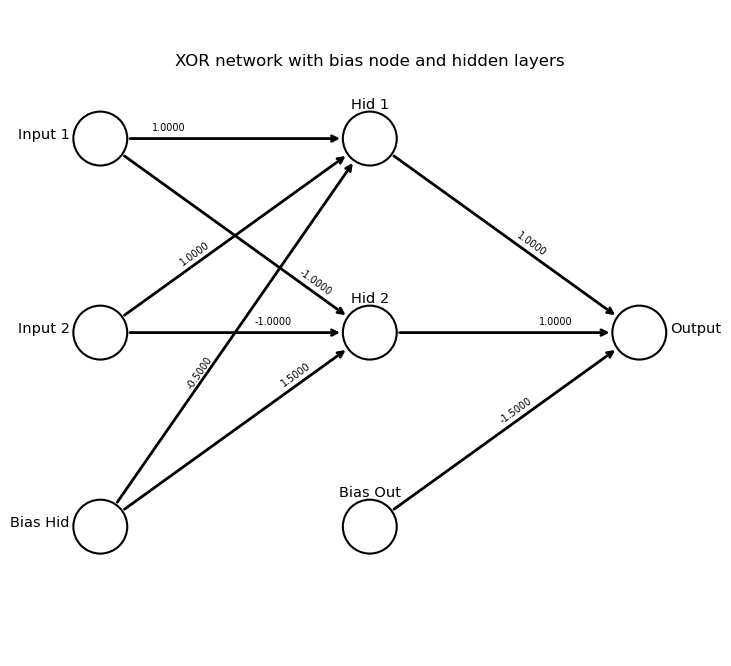

In [10]:
import matplotlib.pyplot as plt
import network_plotter as netplot
import numpy as np

# Define the network for XOR function
layers_xor = [
    ['Input 1', 'Input 2', 'Bias Hid'],
    ['Hid 1', 'Hid 2', 'Bias Out'],
    ['Output']
]

# Set weights for the XOR function
input_to_hidden1_weights_xor = np.array([1.0, 1.0, -0.5])
input_to_hidden2_weights_xor = np.array([-1.0, -1.0, 1.5])
hidden_to_output_weights_xor = np.array([1.0, 1.0, -1.5])
bias_to_output_weight = -1.5

# Setup for the network plot
plot_width = 7.0
plot_height = plot_width
fig_width = plot_width * 1.2
fig_height = fig_width
figsize = (fig_width, fig_height)

# Creating the figure for the XOR network
fig, ax = plt.subplots(figsize=figsize)
ax.set_xlim(0, fig_width)
ax.set_ylim(0, fig_height)
ax.set_aspect('equal', adjustable='box')

# Calculate node positions for the XOR network
node_positions_xor = netplot.calculate_node_positions(layers_xor, plot_width, fig_width, fig_height)

# Draw Neurons with Labels for the XOR network
num_layers_xor = len(layers_xor)
subtext_xor = ''
nodetext_xor = ''
for i, column in enumerate(layers_xor):
    for node in column:
        pos = node_positions_xor[node]
        netplot.draw_neuron_with_label(ax, pos, node, i, num_layers_xor, plot_width=plot_width, subtext=subtext_xor, nodetext=nodetext_xor)

# Draw Connections with Weights for the XOR network
# Input to Hidden Layer 1
for i, input_node in enumerate(layers_xor[0]):
    weight = input_to_hidden1_weights_xor[i]
    netplot.draw_connection_with_weight(ax, node_positions_xor, input_node, 'Hid 1', weight, show_weight=True, plot_width=plot_width)

# Input to Hidden Layer 2
for i, input_node in enumerate(layers_xor[0]):
    weight = input_to_hidden2_weights_xor[i]
    netplot.draw_connection_with_weight(ax, node_positions_xor, input_node, 'Hid 2', weight, show_weight=True, plot_width=plot_width)

# Hidden to Output Layer
for i, hidden_node in enumerate(layers_xor[1]):
    weight = hidden_to_output_weights_xor[i]
    netplot.draw_connection_with_weight(ax, node_positions_xor, hidden_node, 'Output', weight, show_weight=True, plot_width=plot_width)

# Adding the connection from Bias to Output
#bias_to_output_weight = hidden_to_output_weights_xor[-1]
#netplot.draw_connection_with_weight(ax, node_positions_xor, 'Bias', 'Output', bias_to_output_weight, show_weight=True, plot_width=plot_width)
   
plt.title('XOR network with bias node and hidden layers', x=0.5, y=0.9)
plt.axis('off')
plt.show()

## Evaluating the network

Let's check that it seems to properly perform XOR. 

In [11]:
def step_activation(x):
    return np.where(x > 0, 1, 0)

def compute_xor_network(inputs, weights):
    # Unpack weights
    w_input_hidden1, w_input_hidden2, w_hidden_output = weights

    for input in inputs:
        # Calculate the initial states (sums) for Hid 1 and Hid 2
        hid1_sum = np.dot(input, w_input_hidden1)
        hid2_sum = np.dot(input, w_input_hidden2)

        # Apply step activation function to get the final output values for Hid 1 and Hid 2
        hid1_output = step_activation(hid1_sum)
        hid2_output = step_activation(hid2_sum)

        # Calculate the raw input to the Output node
        output_sum = hid1_output * w_hidden_output[0] + hid2_output * w_hidden_output[1] + 1 * w_hidden_output[2]

        # Apply step function to get the final Output value
        final_output = step_activation(output_sum)

        # Print the input values, raw and stepped values for Hid 1, Hid 2, and Output
        print(f"Input: {input}, Hid 1: ({hid1_sum}, {hid1_output}), Hid 2: ({hid2_sum}, {hid2_output}), Output: ({output_sum}, {final_output})")

# Inputs and weights remain the same as the previous example
weights_xor = [
    input_to_hidden1_weights_xor,
    input_to_hidden2_weights_xor, 
    hidden_to_output_weights_xor
]

# Running the XOR network with the corrected logic
compute_xor_network(inputs, weights_xor)

Input: [0 0 1], Hid 1: (-0.5, 0), Hid 2: (1.5, 1), Output: (-0.5, 0)
Input: [0 1 1], Hid 1: (0.5, 1), Hid 2: (0.5, 1), Output: (0.5, 1)
Input: [1 0 1], Hid 1: (0.5, 1), Hid 2: (0.5, 1), Output: (0.5, 1)
Input: [1 1 1], Hid 1: (1.5, 1), Hid 2: (-0.5, 0), Output: (-0.5, 0)


It works!


---

## <font color='red'>Lab question 4</font>

1. Explain why these weights work. What function does Hid 1 implement (via its incoming connections)?  What function does Hid 2 implement? What function does the Output node perform on its inputs from Hid 1 and Hid 2?  

---

## <font color='red'>Lab question 5: Challenge questions</font>

Grad students & honors students: try at least one of these. 

1. Can you come up with a different combination of functions to solve XOR? Construct the network and set the weights and biases. Test it either by working it out by hand or writing some python code to do it. 

2. Can you take the XOR network above and restructure it? For example, can you find a solution that leaves out one of the Bias nodes? You can add nodes to the hidden layer, or even add a second hidden layer. 


---


#### We are going to need another approach to train a network to do XOR. That's what we will do in the next notebook (nnets-03). 

